 # Tema 8:  Neuronal Netword MLP
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : MLP \\
  Termina      :
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: Mezita Torres,Fabryzzio Jossue
 - Integrante 2:Monja Castro, Jeffrey Antonio
 - Integrante 3:Salinas Salas, Joaquin Mauricio
 - Integrante 3:Tipula Meza, Flavio Jose
 ----




In [ ]:
import torch
import pandas as pd
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split

# Base de datos.
For this practice, we have a lung cancer database with 310 records. Each record has 15 features, and the last column represents the class or label (YES = 1, NO = 0).

You should split the dataset into 70% for training and 30% for testing.

- Database [Here](https://docs.google.com/spreadsheets/d/1UgARjsg2BDeeJzcfPsydqFANqKHNOhXyVDoqL9_VIcc/edit?usp=sharing)

In [ ]:
# Prepare Colab to work with CUDA.
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

from google.colab import drive
drive.mount('/content/drive')

# Read the dataset
path = "/content/drive/Shared drives/G5/cancer_pulmon.csv"
data = pd.read_csv(path)
data.head()

# Separate the data into x and y
x_data = data.iloc[:, :15]
y_data = data.iloc[:, -1]

# Remember the data must be transformed to torch tensors for PyTorch to handle and understand.

# Write your code here

cuda:0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Dentro del datasetm cambiamos las etiquetas de los generos y las salidas por valores numericos, para la normalizacion
x_data['GENDER'] = x_data['GENDER'].map({'M': 0, 'F': 1})
y_data = y_data.map({'NO': 0, 'YES': 1})

## Normalization, Reduction and split

In [ ]:
#Usando el StandardScaler normalizamos la data
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_data)

#Se aplica PCA sin ningun numero fijo de componentes
pca = PCA()
pca.fit(x_norm)

#Se deterina la varianza acumulada para los distintos componentes, y la que tenga mejor exito al llegar al 90% de recuperacion, es el numero de componetes a usar
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
componentes = np.argmax(varianza_acumulada >= 0.90) + 1

#Se usa el numero de componentes que definimos antes para la descomposicion
pca = PCA(n_components=componentes)
x_data_pca = pca.fit_transform(x_norm)

#idivimos los datos para training y testing
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm, y_data, test_size=0.3, random_state=42)

x_train_norm_torch = torch.tensor(x_train_norm, dtype=torch.float32)
x_test_norm_torch = torch.tensor(x_test_norm, dtype=torch.float32)
y_train_norm_torch = torch.tensor(y_train_norm, dtype=torch.long)
y_test_norm_torch = torch.tensor(y_test_norm.values, dtype=torch.long)

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_data_pca, y_data, test_size=0.3, random_state=42)

x_train_pca_torch = torch.tensor(x_train_pca, dtype=torch.float32)
x_test_pca_torch = torch.tensor(x_test_pca, dtype=torch.float32)
y_train_pca_torch = torch.tensor(y_train_pca, dtype=torch.long)
y_test_pca_torch = torch.tensor(y_test_pca.values, dtype=torch.long)

# Neural Network Design

## Input:
- The input to the network is a vector of dimension 15. (Remember to normalize the data)
- You can use PCA or another method to reduce dimensionality and see the impact on the result

## Structure:

You should design 3 types of MLP:

- MLP with one hidden layer
- MLP with two hidden layers
- MLP with three hidden layers
- What should be the activation function of the output layer and why?

## Output:
- The network has 2 output neurons. (1,0) indicates **no cancer** and (0,1) indicates **cancer**.
- You should choose the activation function for the output layer according to the values it should return.

----
## Help Link:
- [Torch Linear Model](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [Examples](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html)
- [Activation Functions](https://pytorch.org/docs/stable/nn.functional.html)



In [ ]:
 class MLP(torch.nn.Module):
    def __init__(self, n):
        super(MLP, self).__init__()
        # Create the layers of the neural network here
        self.layersJuan=torch.nn.Sequential(
        torch.nn.Linear(15,n),
        torch.nn.ReLU(),
        torch.nn.Linear(n,2)
        )
         # self.layer_1 = torch.nn.Sequential(
          #   torch.nn.Linear(15, n),
          #  torch.nn.ReLU(),
          #  torch.nn.Linear(n, 2)
          # )

    def forward(self, x):
        output = self.layersJuan(x)

        return output


# Loss Function and Optimizer
For each MLP, you should create its loss function and optimizer.
- Keep in mind that the output of the network is a vector with two values, each value between zero and one. For example, the output might be (0.92, 0.08), which indicates that the patient has a 92% probability of not having cancer and an 8% probability of having cancer.

- Given this information, consider what would be the appropriate loss function. No, it is not MSE.

----

- [Loss Function](https://neptune.ai/blog/pytorch-loss-functions)
- [Optimizers](https://machinelearningmastery.com/using-optimizers-from-pytorch/)

In [ ]:
#Creamos nuestra clase
n=128
model1 = MLP(n)
model1.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.01)

# Training

- In this stage, you should train your neural network.
- The training code is already prepared to work for you.

In [ ]:
def train(model, loss_f, optimizer,epochs, x_train, y_train):
    loss_lista = []
    i=0
    for epoch in range(epochs):

        x_train = x_train.to(device)
        y_train = y_train.to(device)

        # Propagacion adelante
        y_pred = model(x_train)
        loss   = loss_f(y_pred,y_train)
        loss_lista.append(loss.cpu())
        i=i+1
        if (epoch%500==0):
          print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss_lista

In [ ]:
print("Modelo 1")
loss_lista2 = train(model1,loss, optimizer, 10000, x_train_norm_torch,y_train_norm_torch)

Modelo 1
Epoch 0: train loss: 0.7381344437599182
Epoch 500: train loss: 0.007725513074547052
Epoch 1000: train loss: 0.0066298129968345165
Epoch 1500: train loss: 0.006501009222120047
Epoch 2000: train loss: 0.00646193278953433
Epoch 2500: train loss: 0.006467840634286404
Epoch 3000: train loss: 0.006449314299970865
Epoch 3500: train loss: 0.006433582399040461
Epoch 4000: train loss: 0.006426358595490456
Epoch 4500: train loss: 0.0064246137626469135
Epoch 5000: train loss: 0.0064257062040269375
Epoch 5500: train loss: 0.006424153223633766
Epoch 6000: train loss: 0.006421748548746109
Epoch 6500: train loss: 0.006420311983674765
Epoch 7000: train loss: 0.006419805344194174
Epoch 7500: train loss: 0.006419398356229067
Epoch 8000: train loss: 0.00641911244019866
Epoch 8500: train loss: 0.006418897770345211
Epoch 9000: train loss: 0.006431853398680687
Epoch 9500: train loss: 0.006418533157557249


# Testing
- Complete the test function so that you can find the accuracy of the model, plot the confusion matrix, and display metrics such as F1-score, precision, and recall.

In [ ]:
def test(model, x_test, y_test):
    x_test = x_test.to(device)
    y_test = y_test.to(device)
    with torch.no_grad():
        y_pred = model(x_test)

    y_pred_labels=torch.argmax(y_pred,dim=1)

    y_pred_labels = y_pred_labels.cpu().numpy()
    y_test_cpu = y_test.cpu().numpy()

    confusion_matri = confusion_matrix(y_test_cpu, y_pred_labels)
    print(classification_report(y_test_cpu, y_pred_labels))
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matri, annot=True, fmt='d', cmap='Reds', xticklabels=["No Cancer", "Cancer :("], yticklabels=["No Cancer", "Cancer :("])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title("Matriz de Confusión")
    plt.show()




              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.98      0.97      0.97        86

    accuracy                           0.95        93
   macro avg       0.80      0.84      0.82        93
weighted avg       0.95      0.95      0.95        93



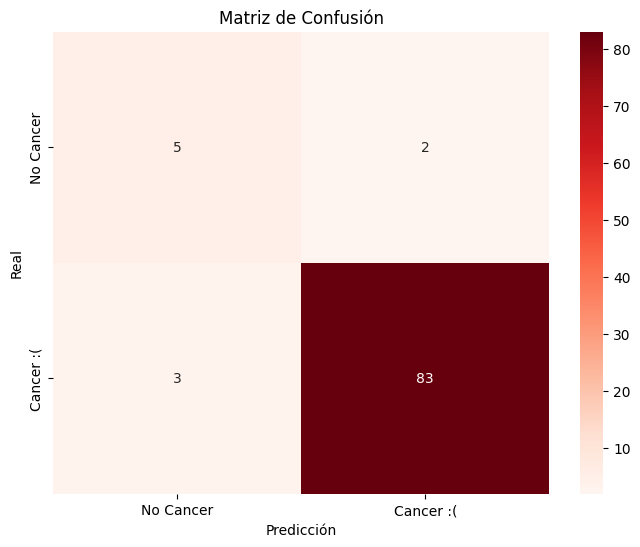

In [ ]:
test(model1, x_test_norm_torch, y_test_norm_torch)